## Project: Write A Data Science Blog Post

##### In this project I will choose dataset and pose at least three quesstions related to business or real-world applications. 

### 1. Business Understanding
Each year Stack Overflow field a survey covering everything from developers' favourite technologies to their job preferences. In this project, I will explore the 2019 Stack Overflow results dataset.


I will explore the following questions:
- How much does a software developer make?
- What is the developer salary by level of education?
- Which country has the highest job satisfaction?
- What is the average salary for devlopers KSA?

### 2. Data Understanding

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Load in survey results data
df = pd.read_csv('survey_results_public2.csv')

In [3]:
# Load in data schema 
schema = pd.read_csv('survey_results_schema.csv')

In [4]:
# Check the structure of the data
df.shape

(88883, 85)

In [5]:
# Check columns names
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [6]:
# Assess missing data
df.isnull().sum()

Respondent            0
MainBranch          552
Hobbyist              0
OpenSourcer           0
OpenSource         2041
Employment         1702
Country             132
Student            1869
EdLevel            2493
UndergradMajor    13269
EduOther           4623
OrgSize           17092
DevType            7548
YearsCode           945
Age1stCode         1249
YearsCodePro      14552
CareerSat         16036
JobSat            17895
MgrIdiot          27724
MgrMoney          27726
MgrWant           27651
JobSeek            8328
LastHireDate       9029
LastInt           21728
FizzBuzz          17539
JobFactors         9512
ResumeUpdate      11006
CurrencySymbol    17491
CurrencyDesc      17491
CompTotal         32938
                  ...  
Containers         3517
BlockchainOrg     40708
BlockchainIs      28718
BetterLife         2614
ITperson           1742
OffOn              2220
SocialMedia        4446
Extraversion       1578
ScreenName         8397
SOVisit1st         5006
SOVisitFreq     

In [7]:
#Check the description of the columns
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''

    desc = schema.set_index('Column').loc[column_name].values.tolist()
    return desc

In [8]:
get_description('MainBranch')

['Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."']

In [9]:
get_description('Country')

['In which country do you currently reside?']

In [10]:
get_description('EdLevel')

['Which of the following best describes the highest level of formal education that you’ve completed?']

In [11]:
get_description('UndergradMajor')

['What was your main or most important field of study?']

In [12]:
get_description('ConvertedComp')

['Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.']

In [13]:
get_description('CareerSat')

['Overall, how satisfied are you with your career thus far?']

**Pose Questions:**

- How much does a software developer make?
- What is the developer salary by level of education?
- Which country has the highest job satisfaction?
- What is the average salary for devlopers KSA?

### 3. Prepare data


In [14]:
# Extract  necessary columns to answer the questions.
sub_df = df[['MainBranch', 'Country' , 'EdLevel', 'UndergradMajor', 'ConvertedComp', 'CareerSat']]

In [15]:
sub_df.head()

,MainBranch,Country,EdLevel,UndergradMajor,ConvertedComp,CareerSat
0,I am a student who is learning to code,United Kingdom,Primary/elementary school,NaN,NaN,NaN
1,I am a student who is learning to code,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...",Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,8820.0,Slightly satisfied
3,I am a developer by profession,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",61000.0,Very satisfied
4,I am a developer by profession,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied


In [16]:
# Change column names to AnnualSalary
sub_df.rename(columns={"MainBranch": "Developer_Kind", "ConvertedComp": "Annual_Salary", "EdLevel": "Education_Level",
                       "UndergradMajor":"Undergrad_Major"}, inplace = True)

In [17]:
sub_df.head()

,Developer_Kind,Country,Education_Level,Undergrad_Major,Annual_Salary,CareerSat
0,I am a student who is learning to code,United Kingdom,Primary/elementary school,NaN,NaN,NaN
1,I am a student who is learning to code,Bosnia and Herzegovina,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...",Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,8820.0,Slightly satisfied
3,I am a developer by profession,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",61000.0,Very satisfied
4,I am a developer by profession,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied


**Assess Missing Data**

In [18]:
#Check null values
sub_df.isnull().sum()

Developer_Kind       552
Country              132
Education_Level     2493
Undergrad_Major    13269
Annual_Salary      33060
CareerSat          16036
dtype: int64

In [19]:
# Data proportion in each column
1 - sub_df.isnull().mean()

Developer_Kind     0.993790
Country            0.998515
Education_Level    0.971952
Undergrad_Major    0.850714
Annual_Salary      0.628050
CareerSat          0.819583
dtype: float64

In [20]:
sub_df[sub_df['Annual_Salary'].isnull()].isnull().sum()

Developer_Kind       552
Country              132
Education_Level     1662
Undergrad_Major     8710
Annual_Salary      33060
CareerSat          16036
dtype: int64

In [21]:
sub_df[sub_df['CareerSat'].isnull()].isnull().sum()

Developer_Kind       552
Country              132
Education_Level     1081
Undergrad_Major     6955
Annual_Salary      16036
CareerSat          16036
dtype: int64

**I prefer to drop missing values in the salary column because All columns share rows associated with missing values with salary column**

In [22]:
# Drop missing values in salary column..
sub_df.dropna(subset=['Annual_Salary'], axis = 0, inplace = True)

In [23]:
1 - sub_df.isnull().mean()

Developer_Kind     1.000000
Country            1.000000
Education_Level    0.985114
Undergrad_Major    0.918331
Annual_Salary      1.000000
CareerSat          1.000000
dtype: float64

In [24]:
# Drop rows with missing values..
sub_df.dropna(axis=0, how='all', inplace = True) 

**Assess categorical variables**

**Re-Encode Features**

In [25]:
def clean_data(df, col):
    '''
    INPUT - df - a dataframe holding the col column
            col - string - the name of the column you would like to remove parentheses with words in them
        
     OUTPUT - 
            filtred dataframe
    '''
    for i in df[col].unique():
        df[col] = df[col].str.replace(r"\(.*\)","")
    return df

In [26]:
sub_df['Developer_Kind'].value_counts()

I am a developer by profession                                                   50502
I am not primarily a developer, but I write code sometimes as part of my work     5321
Name: Developer_Kind, dtype: int64

In [27]:
sub_df['Developer_Kind'].replace({'I am a developer by profession' : 'Developer', 
                              'I am not primarily a developer, but I write code sometimes as part of my work': 'Non-developer who sometimes writes code'}, inplace = True)

In [28]:
sub_df['Developer_Kind'].value_counts()

Developer                                  50502
Non-developer who sometimes writes code     5321
Name: Developer_Kind, dtype: int64

In [29]:
def bar_plot(df, col):
    '''
    INPUT - df - a dataframe holding the col column
            col - string - the name of the column you would like to plot
    OUTPUT - 
            Displays a bar plot of the col column.
    '''
    base_color = sb.color_palette()[0]
    title = col.replace('_', ' ')
    col_vals = df[col].value_counts()
    (col_vals/df.shape[0]).plot(kind="barh", color = base_color);
    plt.title(title)

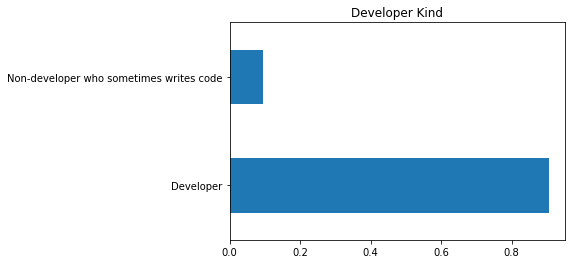

In [30]:
bar_plot(sub_df, 'Developer_Kind')

In [31]:
sub_df['Education_Level'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              27063
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           13826
Some college/university study without earning a degree                                 6496
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2823
Associate degree                                                                       1860
Other doctoral degree (Ph.D, Ed.D., etc.)                                              1699
Professional degree (JD, MD, etc.)                                                      745
Primary/elementary school                                                               260
I never completed any formal education                                                  220
Name: Education_Level, dtype: int64

In [32]:
clean_data(sub_df, 'Education_Level')

,Developer_Kind,Country,Education_Level,Undergrad_Major,Annual_Salary,CareerSat
2,Non-developer who sometimes writes code,Thailand,Bachelor’s degree,Web development or web design,8820.0,Slightly satisfied
3,Developer,United States,Bachelor’s degree,"Computer science, computer engineering, or sof...",61000.0,Very satisfied
5,Non-developer who sometimes writes code,Canada,Bachelor’s degree,Mathematics or statistics,366420.0,Very satisfied
8,Developer,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",95179.0,Slightly satisfied
9,Developer,India,Master’s degree,NaN,13293.0,Slightly dissatisfied
12,Developer,United States,Master’s degree,"Computer science, computer engineering, or sof...",90000.0,Very satisfied
13,Developer,Germany,Other doctoral degree,"Computer science, computer engineering, or sof...",57060.0,Very satisfied
15,Developer,United Kingdom,Master’s degree,NaN,455352.0,Very satisfied
16,Developer,Australia,Bachelor’s degree,"Computer science, computer engineering, or sof...",65277.0,Slightly satisfied
17,Non-developer who sometimes writes code,Russian Federation,Master’s degree,"Computer science, computer engineering, or sof...",21996.0,Slightly satisfied


In [33]:
sub_df['Education_Level'].value_counts()

Bachelor’s degree                                         27063
Master’s degree                                           13826
Some college/university study without earning a degree     6496
Secondary school                                           2823
Associate degree                                           1860
Other doctoral degree                                      1699
Professional degree                                         745
Primary/elementary school                                   260
I never completed any formal education                      220
Name: Education_Level, dtype: int64

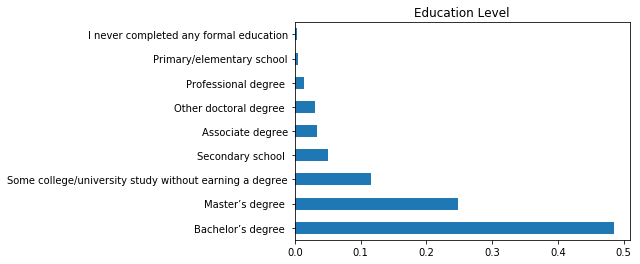

In [34]:
bar_plot(sub_df, 'Education_Level')

In [35]:
sub_df['Undergrad_Major'].value_counts()

Computer science, computer engineering, or software engineering          32356
Another engineering discipline (ex. civil, electrical, mechanical)        4204
Information systems, information technology, or system administration     3460
A natural science (ex. biology, chemistry, physics)                       2303
Web development or web design                                             2030
Mathematics or statistics                                                 2030
A business discipline (ex. accounting, finance, marketing)                1154
A humanities discipline (ex. literature, history, philosophy)             1138
A social science (ex. anthropology, psychology, political science)         962
Fine arts or performing arts (ex. graphic design, music, studio art)       898
I never declared a major                                                   575
A health science (ex. nursing, pharmacy, radiology)                        154
Name: Undergrad_Major, dtype: int64

In [36]:
clean_data(sub_df, 'Undergrad_Major')

,Developer_Kind,Country,Education_Level,Undergrad_Major,Annual_Salary,CareerSat
2,Non-developer who sometimes writes code,Thailand,Bachelor’s degree,Web development or web design,8820.0,Slightly satisfied
3,Developer,United States,Bachelor’s degree,"Computer science, computer engineering, or sof...",61000.0,Very satisfied
5,Non-developer who sometimes writes code,Canada,Bachelor’s degree,Mathematics or statistics,366420.0,Very satisfied
8,Developer,New Zealand,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",95179.0,Slightly satisfied
9,Developer,India,Master’s degree,NaN,13293.0,Slightly dissatisfied
12,Developer,United States,Master’s degree,"Computer science, computer engineering, or sof...",90000.0,Very satisfied
13,Developer,Germany,Other doctoral degree,"Computer science, computer engineering, or sof...",57060.0,Very satisfied
15,Developer,United Kingdom,Master’s degree,NaN,455352.0,Very satisfied
16,Developer,Australia,Bachelor’s degree,"Computer science, computer engineering, or sof...",65277.0,Slightly satisfied
17,Non-developer who sometimes writes code,Russian Federation,Master’s degree,"Computer science, computer engineering, or sof...",21996.0,Slightly satisfied


In [37]:
sub_df['Undergrad_Major'].value_counts()

Computer science, computer engineering, or software engineering          32356
Another engineering discipline                                            4204
Information systems, information technology, or system administration     3460
A natural science                                                         2303
Web development or web design                                             2030
Mathematics or statistics                                                 2030
A business discipline                                                     1154
A humanities discipline                                                   1138
A social science                                                           962
Fine arts or performing arts                                               898
I never declared a major                                                   575
A health science                                                           154
Name: Undergrad_Major, dtype: int64

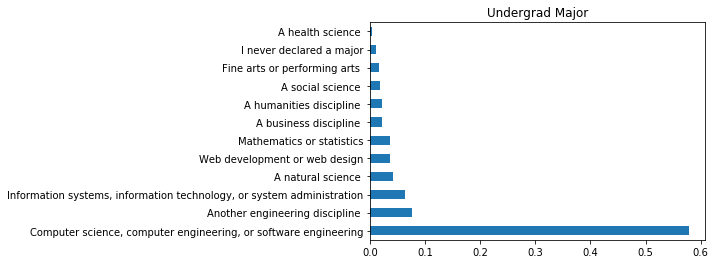

In [38]:
bar_plot(sub_df, 'Undergrad_Major')

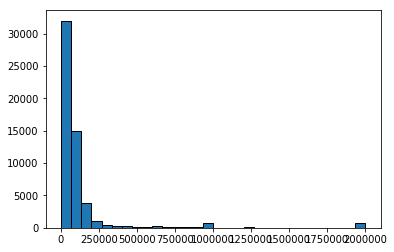

In [39]:
plt.hist(sub_df['Annual_Salary'], bins = 30, edgecolor = 'black');

In [40]:
sub_df.CareerSat.value_counts()

Very satisfied                        23257
Slightly satisfied                    19456
Slightly dissatisfied                  5692
Neither satisfied nor dissatisfied     4759
Very dissatisfied                      2659
Name: CareerSat, dtype: int64

In [41]:
sub_df['CareerSat'].replace({'Very satisfied' : 4, 
                            'Slightly satisfied': 3,
                            'Slightly dissatisfied': 2,
                            'Neither satisfied nor dissatisfied': 1,
                            'Very dissatisfied': 0}, inplace = True)

In [42]:
sub_df.CareerSat.value_counts()

4    23257
3    19456
2     5692
1     4759
0     2659
Name: CareerSat, dtype: int64

### 4. Analyze, Modeling, and Visualize

#### Question1: How much does a developer make?

In [43]:
sub_df['Annual_Salary'].mean(), sub_df['Annual_Salary'].max(), sub_df['Annual_Salary'].median()

(127110.73842323056, 2000000.0, 57287.0)

In [44]:
pd.DataFrame(sub_df['Annual_Salary'].describe())

,Annual_Salary
count,5.582300e+04
mean,1.271107e+05
std,2.841523e+05
min,0.000000e+00
25%,2.577750e+04
50%,5.728700e+04
75%,1.000000e+05
max,2.000000e+06


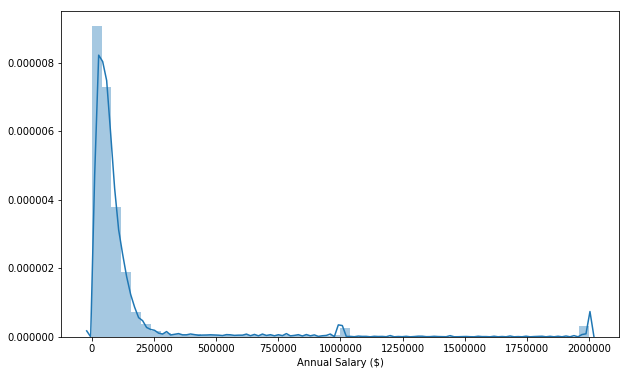

In [45]:
f, ax = plt.subplots(figsize=(10, 6))

ax = sb.distplot(sub_df['Annual_Salary'])
plt.xlabel('Annual Salary ($)');

#### Question2: What is the developer salary by level of education?

In [46]:
pd.DataFrame(sub_df.query("Developer_Kind == 'Developer' ").groupby(['Education_Level']).mean()['Annual_Salary']).sort_values(by = 'Annual_Salary', ascending=False)

,Annual_Salary
Education_Level,
Other doctoral degree,182910.877768
I never completed any formal education,149399.673267
Associate degree,144764.033077
Bachelor’s degree,134980.777222
Master’s degree,120875.909584
Some college/university study without earning a degree,116971.984060
Primary/elementary school,95271.360000
Professional degree,84585.213752
Secondary school,84052.489780


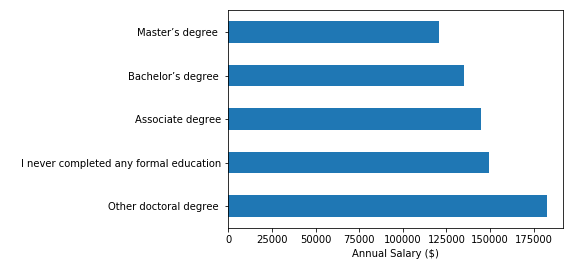

In [47]:
base_color = sb.color_palette()[0]
edlevel = (sub_df.query("Developer_Kind == 'Developer' ").groupby(['Education_Level']).mean()['Annual_Salary']).sort_values(ascending=False).head()
edlevel.plot(kind = 'barh', color = base_color );
plt.ylabel(' ')
plt.xlabel('Annual Salary ($)');

#### Question4:Which country has the highest devloper salary?

In [48]:
pd.DataFrame(sub_df.query("Developer_Kind == 'Developer' ").groupby(['Country']).mean()['Annual_Salary']).sort_values(by = 'Annual_Salary', ascending=False).head()

,Annual_Salary
Country,
Liechtenstein,811188.00000
San Marino,577452.00000
United States,251783.92000
Ireland,247802.42671
Swaziland,242607.50000


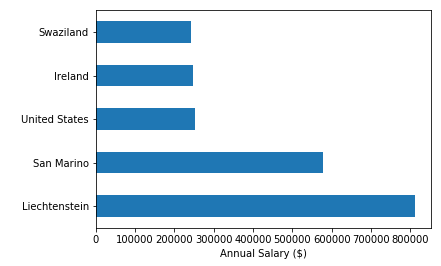

In [49]:
base_color = sb.color_palette()[0]
paid_countries = (sub_df.query("Developer_Kind == 'Developer' ").groupby(['Country']).mean()['Annual_Salary']).sort_values(ascending=False).head()
paid_countries.plot(kind = 'barh', color = base_color );
plt.ylabel(' ')
plt.xlabel('Annual Salary ($)');

#### Question4:Which country has the highest job satisfaction?

In [50]:
(sub_df.query("Developer_Kind == 'Developer' ").groupby(['Country'])['CareerSat']).mean().sort_values(ascending=False).head(10)

Country
Somalia                             4.000000
Oman                                4.000000
Barbados                            4.000000
San Marino                          4.000000
Democratic Republic of the Congo    4.000000
Yemen                               3.666667
Haiti                               3.500000
Zambia                              3.400000
Mozambique                          3.333333
Qatar                               3.333333
Name: CareerSat, dtype: float64

#### Question5: What is the average salary for devlopers in  KSA?

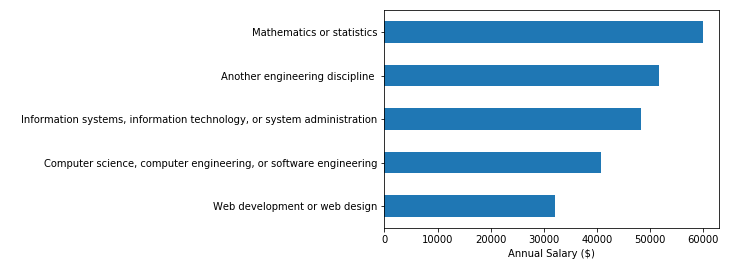

In [51]:
base_color = sb.color_palette()[0]
KSA_sal = (sub_df.query("Developer_Kind == 'Developer' and ( Country == 'Saudi Arabia')").groupby(['Undergrad_Major']).mean()['Annual_Salary']).sort_values()
KSA_sal.plot(kind = 'barh', color = base_color)
plt.ylabel(' ')
plt.xlabel('Annual Salary ($)');

In [52]:
(sub_df.query("Developer_Kind == 'Developer' and ( Country == 'Saudi Arabia')").mean()['Annual_Salary'])

46524.42222222222

### 4- Evaluate the Results

- Developers made a mean salary of \$127,110 annually.
- best-paid 25 percent made \$100,000.
- lowest-paid 25 percent made \$257,77.
- The level of education with the highest average annual salaries for software developers are doctoral degree (\$182,910).
- The countries that pay the highest salary in the software developer profession are Liechtenstein, San Marino, United States, Ireland, and Swaziland.
-  The countries that have the highest career satisfaction in the software developer profession are Somalia, Oman, Barbados, San Marino, and Democratic Republic of the Congo.
- The average salary for a Software Developer in Saudi Arabia is \$46524 per year.